In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import matplotlib.font_manager as fm
import yfinance as yf
import datetime
from datetime import timedelta, datetime
import openpyxl
import setuptools
import pandas_datareader as pdr

In [3]:
dfMENSAL = pd.read_excel('BASE_MENSAL_GAME_SET.xlsx')
dfCOMPRA = dfMENSAL.query('OPERAÇÃO == "Compra"')
dfVENDA = dfMENSAL.query('OPERAÇÃO == "Venda"')

dfCOMPRA_final = dfCOMPRA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                      'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last', 'VAR_PRECO':'sum','CATEGORIAS ATUAIS':'last',
                                                                      'CATEGORIAS ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                      'CATEGORIAS':'first'})
                                                                                                                            
dfVENDA_final = dfVENDA.groupby(['DOCUMENTO'], as_index=False).agg({'DOCUMENTO':'first','NOME':'first','PF_PJ':'first','TOTAL':'first','TOTAL_NOVO':'last','VAR_COTAS':'sum',
                                                                    'OPERAÇÃO':'first','FINANCEIRO_ATUAL':'first','FINANCEIRO_NOVO':'last','VAR_PRECO':'sum','CATEGORIAS ATUAIS':'last',
                                                                    'CATEGORIAS ANTIGAS':'first','Participação_sup':'sum','DATA':'first',
                                                                    'CATEGORIAS':'first'})

total_compra = dfCOMPRA['VAR_PRECO'].sum()
total_venda = dfVENDA['VAR_PRECO'].sum()
delta_sum = total_compra+total_venda
print('o valor de compra é {} e o valor de venda é {}, e o total é {}'.format(total_compra, total_venda, delta_sum))

o valor de compra é 2757050.94 e o valor de venda é 2757050.94, e o total é 5514101.88


In [4]:
dfCOMPRA_final['Participação_sup'] = (dfCOMPRA_final['VAR_PRECO']/total_compra)*100
compra1 = dfCOMPRA_final['Participação_sup'].sum()
dfVENDA_final['Participação_sup'] = (dfVENDA_final['VAR_PRECO']/total_venda)*100
venda1 = dfVENDA_final['Participação_sup'].sum()
print('o total de compra é {} e o total de venda é {}'.format(compra1, venda1))

o total de compra é 100.0 e o total de venda é 100.0


In [5]:
plim = dfCOMPRA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

plim.set_index('CATEGORIAS')

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(str)

plim['OPERAÇÃO_PF_PJ'] = plim['OPERAÇÃO'] + ' ' + plim['PF_PJ']

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['VAR_PRECO'] = np.where(plim['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 plim['VAR_PRECO']* -1,
                                                 plim['VAR_PRECO'])

plim['% PARTICIPAÇÃO'] = ((plim['VAR_PRECO']/(total_compra))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

plim['CLASSE_CATEGORIA'] = plim['CATEGORIAS'].map(mapeamento)

plim['CATEGORIAS'] = plim['CATEGORIAS'].astype(int)

plim = plim.sort_values(by='CATEGORIAS')

plim['VAR_PRECO'].astype(float)

plim['VAR_PRECO'] = plim['VAR_PRECO'].round(2)

plim

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Compra,PF,305776.53,Compra PF,11.09,0-1k
1,1,Compra,PJ,93.22,Compra PJ,0.00,0-1k
2,2,Compra,PF,451323.30,Compra PF,16.37,1k-5k
3,2,Compra,PJ,157607.28,Compra PJ,5.72,1k-5k
4,3,Compra,PF,445083.38,Compra PF,16.14,5k-20k
5,4,Compra,PF,160452.68,Compra PF,5.82,20k-50k
6,4,Compra,PJ,87693.25,Compra PJ,3.18,20k-50k
7,5,Compra,PF,210662.49,Compra PF,7.64,50k-100k
8,5,Compra,PJ,90310.59,Compra PJ,3.28,50k-100k
9,6,Compra,PF,96155.57,Compra PF,3.49,100k-500k


In [6]:
v = dfVENDA_final.groupby(by = ['CATEGORIAS', 'OPERAÇÃO', 'PF_PJ'])['VAR_PRECO'].sum().reset_index()

v.set_index('CATEGORIAS')

v['CATEGORIAS'] = v['CATEGORIAS'].astype(str)

v['OPERAÇÃO_PF_PJ'] = v['OPERAÇÃO'] + ' ' + v['PF_PJ']

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PF", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['VAR_PRECO'] = np.where(v['OPERAÇÃO_PF_PJ'] == "Venda PJ", 
                                                 v['VAR_PRECO']* -1,
                                                 v['VAR_PRECO'])

v['% PARTICIPAÇÃO'] = ((v['VAR_PRECO']/(total_venda))*100).round(2)

mapeamento = {'1': '0-1k', '2':'1k-5k', '3':'5k-20k', '4':'20k-50k', '5':'50k-100k', '6':'100k-500k', '7':'500k-1M', '8':'1M-3M', '9':'3M-15M','10':'>15M'}

v['CLASSE_CATEGORIA'] = v['CATEGORIAS'].map(mapeamento)

v['CATEGORIAS'] = v['CATEGORIAS'].astype(int)

v = v.sort_values(by='CATEGORIAS')

v['VAR_PRECO'].astype(float)

v['VAR_PRECO'] = v['VAR_PRECO'].round(2)

v

,CATEGORIAS,OPERAÇÃO,PF_PJ,VAR_PRECO,OPERAÇÃO_PF_PJ,% PARTICIPAÇÃO,CLASSE_CATEGORIA
0,1,Venda,PF,-167873.08,Venda PF,-6.09,0-1k
1,2,Venda,PF,-331860.43,Venda PF,-12.04,1k-5k
2,3,Venda,PF,-384523.46,Venda PF,-13.95,5k-20k
3,4,Venda,PF,-52740.80,Venda PF,-1.91,20k-50k
4,4,Venda,PJ,-108176.79,Venda PJ,-3.92,20k-50k
5,5,Venda,PF,-123464.26,Venda PF,-4.48,50k-100k
6,5,Venda,PJ,-115270.32,Venda PJ,-4.18,50k-100k
7,6,Venda,PF,-176389.29,Venda PF,-6.40,100k-500k
8,7,Venda,PF,-8488.48,Venda PF,-0.31,500k-1M
9,8,Venda,PJ,-165841.72,Venda PJ,-6.02,1M-3M


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_37044\1492811276.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())


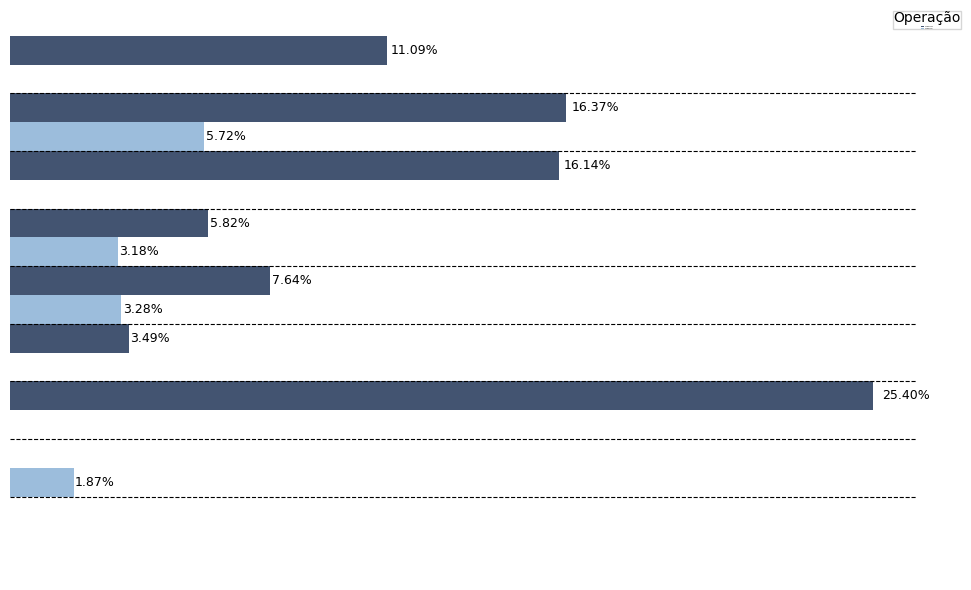

In [7]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=plim, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Compra PF': '#3B5279', 'Compra PJ': '#91BDE7','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(plim['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)


ax.set_yticklabels(plim['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='upper right', fontsize = 0.05)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('COMPRA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_37044\1108589480.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())


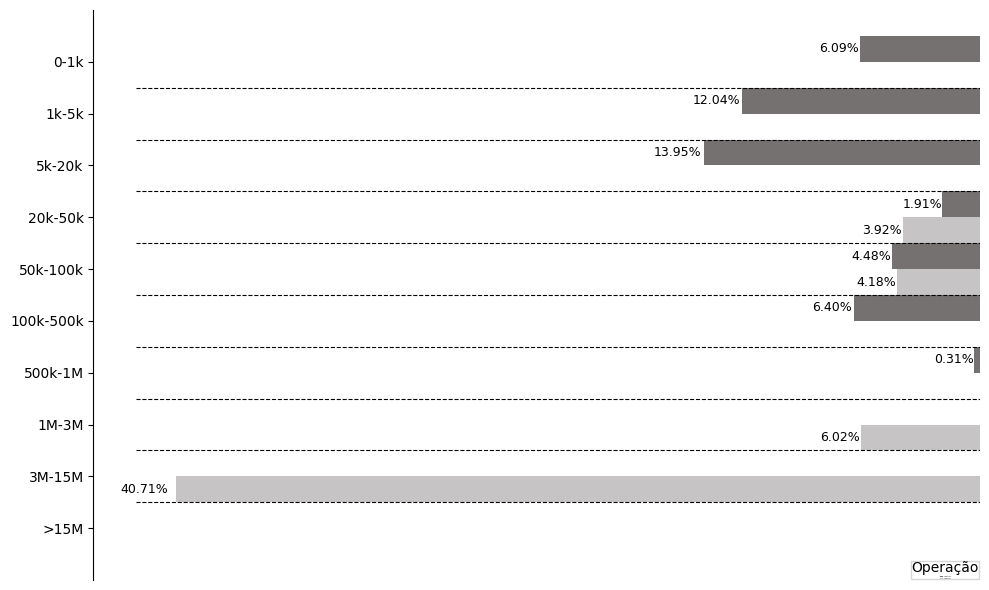

In [8]:
# Suponha que seu DataFrame se chame 'graf' e tenha as colunas 'Categorias', 'Operação', e 'Delta_financeiro'
fig, ax = plt.subplots(figsize=(10, 6))

# Definir os ticks do eixo x com intervalos personalizados
#plt.xticks([0, 1000, 5000, 10000, 20000, 50000, 100000, 500000, 1000000, 5000000, 15000000])

# Criar gráfico de barras horizontais com Seaborn, separando por 'Operação'
sb.barplot(
    data=v, 
    x='% PARTICIPAÇÃO', 
    y='CLASSE_CATEGORIA', 
    hue='OPERAÇÃO_PF_PJ',
    dodge=True,
    ax=ax,
    palette={'Venda PF': '#767070', 'Venda PJ': '#C6C4C4','Manteve PF':'#EAE7E8', 'Manteve PJ':'#2F5597'},
    orient='h',
    width=1
)

xmin, xmax = ax.get_xlim()
for i in range(len(v['CLASSE_CATEGORIA'].unique()) - 1):
    ax.hlines(y=i + 0.5, xmin=xmin, xmax=xmax, color='black', linestyle='--', linewidth=0.8)

#ax.vlines(x=0, ymin=-0.5, ymax=len(graf['CATEGORIAS'].unique()) - 0.5, color='black', linestyle='-', linewidth=1.5)

#ticks = [100000, 500000, 1000000, 2000000]
#ax.set_xticks(ticks)
#ax.set_xticklabels([f'R${x:,}' for x in ticks])
#ax.xaxis.set_tick_params(labelsize = (12))

#ax.set_yticks(range(len(ylabels)))
#ax.set_yticklabels(ylabels, fontsize=11, fontproperties = Avenir)
ax.set_yticklabels(v['CLASSE_CATEGORIA'].unique())
ax.yaxis.set_tick_params(labelsize = (10))


# Adicionar rótulos nas barras
for p in ax.patches:
    # Obtém a largura (valor de x) e a posição do centro da barra
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    
    # Adicionar rótulos formatados com separador de milhares e sem casas decimais
    if abs(x):
        ax.text(
            x + (0.01 * abs(x)) if x >= 0 else x - (0.01 * abs(x)),  # Ajusta o posicionamento do texto com base no sinal
            y, 
            f'{abs(x):,.2f}%',
            ha='left' if x >= 0 else 'right',  # Ajusta a posição horizontal do texto
            va='center',
            color='black',
            fontsize=9,
            #fontproperties = Avenir
        )

# Ajustar os spines (bordas) do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(True)

# Definir rótulos e título
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Operação', loc='lower right', fontsize = 1)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

fig.savefig('VENDA_PF_E_PJ', transparent = True, dpi=500, bbox_inches='tight')

# Exibir o gráfico
plt.show()

In [9]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'

TOP10_Compra = dfCOMPRA_final[[Nome,cat,tipo,fin_mov,cat_atuais]]

TOP10_Compra = TOP10_Compra.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Compra['VAR_PRECO'] = TOP10_Compra['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

TOP10_Compra = TOP10_Compra.set_index('NOME')

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Compra['CATEGORIAS'] = TOP10_Compra['CATEGORIAS'].map(mapear)

TOP10_Compra

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS
NOME,,,,
CARLOS EDUARDO RODRIGUES GOMES,500k-1M,PF,700373.00,500k-1M
XTX MARKETS TRADING LIMITED,1k-5k,PJ,153604.72,20k-50k
JULIEN AVRIL,50k-100k,PF,140840.03,100k-500k
GASTAO LUIZ DA COSTA,100k-500k,PF,96155.57,100k-500k
FCOPEL FUNDO DE INVESTIMENTO MULTIMERCADO CREDITO PRIVADO IM,50k-100k,PJ,90310.59,50k-100k
XP INVESTIMENTOS CCTVM S/A,20k-50k,PJ,87693.25,20k-50k
HELISSON FERREIRA COSTA REIS,5k-20k,PF,51726.32,5k-20k
OPORTUNIDADES IMOBILIÁRIAS I FUNDO DE INVESTIMENTO IMOBILIÁR,3M-15M,PJ,51519.65,3M-15M
GUILHERME MUNIZ,20k-50k,PF,42550.00,50k-100k


In [10]:
cat = 'CATEGORIAS'
cat_atuais = 'CATEGORIAS ATUAIS'
Nome = 'NOME'
doc = 'DOCUMENTO'
fin_mov = 'VAR_PRECO'
qtde_mov = 'VAR_COTAS'
Op = 'OPERAÇÃO'
tipo = 'PF_PJ'
qtde = 'TOTAL_NOVO'

TOP10_Venda = dfVENDA_final[[Nome,cat,tipo,fin_mov, cat_atuais]]

TOP10_Venda = TOP10_Venda.sort_values(by = ['VAR_PRECO'], ascending=False).iloc[:10, :]

TOP10_Venda['VAR_PRECO'] = TOP10_Venda['VAR_PRECO'].apply(lambda x: '{:.2f}'.format(x))

mapear = {1: '0-1k', 2:'1k-5k', 3:'5k-20k', 4:'20k-50k', 5:'50k-100k', 6:'100k-500k', 7:'500k-1M', 8:'1M-3M', 9:'3M-15M', 10:'>15M'}

TOP10_Venda['CATEGORIAS'] = TOP10_Venda['CATEGORIAS'].map(mapear)

TOP10_Venda['CATEGORIAS ATUAIS'] = TOP10_Venda['CATEGORIAS ATUAIS'].fillna('0-1k')

TOP10_Venda.set_index('NOME')

,CATEGORIAS,PF_PJ,VAR_PRECO,CATEGORIAS ATUAIS
NOME,,,,
OPORTUNIDADES IMOBILIÁRIAS I FUNDO DE INVESTIMENTO IMOBILIÁR,3M-15M,PJ,1122422.31,3M-15M
FRG PTRIA VBI FUNDO DE INVESTIMENTO FINANCEIRO MULT LP - RES,1M-3M,PJ,165841.72,500k-1M
KAYO LUIZ MATSUMOTO DE OLIVEIRA,100k-500k,PF,127182.17,0-1k
XP INVESTIMENTOS CCTVM S/A,50k-100k,PJ,115270.32,20k-50k
XTX MARKETS TRADING LIMITED,20k-50k,PJ,108176.79,20k-50k
MATHEUS DOMINGOS SANTOS GONCALVES,50k-100k,PF,68878.72,0-1k
HELISSON FERREIRA COSTA REIS,5k-20k,PF,51872.42,0-1k
JULIEN AVRIL,50k-100k,PF,48309.10,100k-500k
EDUARDO HENRIQUE LOPES GOMES,100k-500k,PF,38870.00,50k-100k


In [108]:
game11 = ['GAME11.SA']
fundos_recebiveis = ['KNIP11.SA', 'KNCR11.SA', 'MXRF11.SA', 'IRDM11.SA', 'KNHY11.SA', 'CPTS11.SA', 'RECR11.SA', 'HCTR11.SA',
          'KNHF11.SA', 'MCCI11.SA', 'HGCR11.SA', 'KNUQ11.SA', 'VGHF11.SA', 'VRTA11.SA', 'VGIR11.SA', 'RBRR11.SA',
          'VCJR11.SA', 'DEVA11.SA', 'RBRY11.SA', 'URPR11.SA', 'KNSC11.SA', 'MCRE11.SA', 'VGIP11.SA', 'CVBI11.SA',
          'BTCI11.SA', 'XPCI11.SA', 'RZAK11.SA', 'HABT11.SA', 'BCRI11.SA', 'CACR11.SA', 'AFHI11.SA', 'BARI11.SA',
          'SNCI11.SA', 'KCRE11.SA', 'PORD11.SA', 'MANA11.SA', 'VSLH11.SA', 'OUJP11.SA', 'WHGR11.SA', 'RBRX11.SA',
          'HSAF11.SA', 'KIVO11.SA', 'SPXS11.SA', 'ARRI11.SA', 'CYCR11.SA', 'CLIN11.SA']
papel = ['Recebivel']

def excluir_5_dig(COTA):
    return str(COTA)[:6]

#def peers(x):
 #   if x in peers_diretos:
  #      return 'PEER'
   # else:
    #    return 'NAO PEER'
    
def tijolo_papel(x):
    if x == 'Recebivel':
        return "Papel"
    elif x == "XXXX":
        return "Tijolo"
    else:
        return "Tijolo"

In [109]:
base_ativos = pd.read_excel('Base_ativos.xlsx')
pd.options.display.float_format

base_ativos = base_ativos.drop(columns = ['SUP', 'COTISTAS', 'COTAS', 'DIV Y1', 'DIV Y12', 'DIV Y3', 'DIV Y6'])
base_ativos['MACRO'] = base_ativos['TIPO'].apply(tijolo_papel)

base_papel = base_ativos.query('MACRO == "Papel"')

base_ativos

,TICKER,TIPO,VP MM,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,MACRO
0,KNRI11.SA,HIB Tijolo,4.545722e+09,6.161608e+06,1.066023e+08,Tijolo
1,TVRI11.SA,HIB Tijolo,1.613198e+09,7.327889e+05,1.612136e+07,Tijolo
2,ALZR11.SA,HIB Tijolo,1.268382e+09,1.575624e+06,2.973554e+07,Tijolo
3,GARE11.SA,XXXX,1.354331e+09,5.514611e+06,1.400768e+08,Tijolo
4,RBRP11.SA,HIB Tijolo,9.032974e+08,1.777698e+06,2.209986e+07,Tijolo
...,...,...,...,...,...,...
108,SPXS11.SA,Recebivel,1.864645e+08,2.719521e+05,5.415157e+06,Papel
109,ARRI11.SA,Recebivel,1.756922e+08,4.175919e+05,1.276888e+07,Papel
110,CYCR11.SA,Recebivel,3.388072e+08,8.812710e+05,1.298833e+07,Papel
111,CLIN11.SA,Recebivel,4.195918e+08,8.508966e+05,1.903955e+07,Papel


In [110]:
base_papel

,TICKER,TIPO,VP MM,LIQUIDEZ - MÉDIA,LIQUIDEZ - SOMA,MACRO
67,KNIP11.SA,Recebivel,7.273233e+09,7.587159e+06,1.502087e+08,Papel
68,KNCR11.SA,Recebivel,7.780232e+09,1.239634e+07,2.796022e+08,Papel
69,MXRF11.SA,Recebivel,4.019083e+09,1.188510e+07,2.908929e+08,Papel
70,IRDM11.SA,Recebivel,2.961202e+09,2.769234e+06,5.502531e+07,Papel
71,KNHY11.SA,Recebivel,2.771317e+09,4.878928e+06,7.903621e+07,Papel
72,CPTS11.SA,Recebivel,2.730922e+09,8.132196e+06,1.710111e+08,Papel
73,RECR11.SA,Recebivel,2.374761e+09,2.185647e+06,4.442031e+07,Papel
74,HCTR11.SA,Recebivel,2.232368e+09,8.447559e+05,2.315477e+07,Papel
75,KNHF11.SA,Recebivel,1.892795e+09,4.884545e+06,8.665094e+07,Papel
76,MCCI11.SA,Recebivel,1.547121e+09,2.632288e+06,4.130748e+07,Papel


In [111]:
base_game11_media = base_papel.query('TICKER == "GAME11.SA"')
base_game11_media['TICKER'] = base_game11_media['TICKER'].apply(excluir_5_dig)
base_game11_media['LIQUIDEZ - MÉDIA'] = base_game11_media['LIQUIDEZ - MÉDIA']/1000
base_game11_media = base_game11_media.drop(columns=['LIQUIDEZ - SOMA', 'MACRO', 'TIPO'])

base_game11_soma = base_papel.query('TICKER == "GAME11.SA"')
base_game11_soma['TICKER'] = base_game11_soma['TICKER'].apply(excluir_5_dig)
base_game11_soma['LIQ/VP'] =  base_game11_soma['LIQUIDEZ - SOMA']/base_game11_soma['VP MM']
base_game11_soma = base_game11_soma.drop(columns = ['LIQUIDEZ - MÉDIA', 'MACRO', 'TIPO'])
base_game11_soma


C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_2452\4092570666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_game11_media['TICKER'] = base_game11_media['TICKER'].apply(excluir_5_dig)
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_2452\4092570666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_game11_media['LIQUIDEZ - MÉDIA'] = base_game11_media['LIQUIDEZ - MÉDIA']/1000
C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_2452\4092570666.py:7: SettingWithCopyWarning: 
A val

,TICKER,VP MM,LIQUIDEZ - SOMA,LIQ/VP
112,GAME11,2.013791e+08,1331062.04,0.00661


In [112]:
tic = 'TICKER'
liq = 'LIQUIDEZ - MÉDIA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ = base_papel[[tic, liq, pl]]
TOP10_LIQUIDEZ = TOP10_LIQUIDEZ.sort_values(by=['LIQUIDEZ - MÉDIA'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ['TICKER'] = TOP10_LIQUIDEZ['TICKER'].apply(excluir_5_dig)
TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA'] = TOP10_LIQUIDEZ['LIQUIDEZ - MÉDIA']/1000
TOP10_LIQUIDEZ_GAME_ADD = pd.concat([TOP10_LIQUIDEZ, base_game11_media]).reset_index(drop=True)
TOP10_LIQUIDEZ_GAME_ADD

,TICKER,LIQUIDEZ - MÉDIA,VP MM
0,KNCR11,12396.339405,7.780232e+09
1,MXRF11,11885.095422,4.019083e+09
2,CPTS11,8132.195602,2.730922e+09
3,KNIP11,7587.159068,7.273233e+09
4,KNSC11,5391.451381,1.756025e+09
5,KNUQ11,5244.191075,1.550372e+09
6,KNHF11,4884.544539,1.892795e+09
7,KNHY11,4878.927905,2.771317e+09
8,VGIR11,4210.990910,1.423026e+09
9,VGHF11,3313.523612,1.380933e+09


In [113]:
tic = 'TICKER'
liq = 'LIQUIDEZ - SOMA'
pl = 'VP MM'
#CRIO UM DATAFRAME COM AS MAIORES QUEDAS DO DIA ENTRE OS PEERS DO GARE E O GARE
TOP10_LIQUIDEZ_SOMA = base_papel[[tic, liq, pl]]
TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']
TOP10_LIQUIDEZ_SOMA = TOP10_LIQUIDEZ_SOMA.sort_values(by=['LIQ/VP'], ascending=False).iloc[:10, :]
TOP10_LIQUIDEZ_SOMA['TICKER'] = TOP10_LIQUIDEZ_SOMA['TICKER'].apply(excluir_5_dig)
TOP10_LIQUIDEZ_SOMA_GAME_ADD = pd.concat([TOP10_LIQUIDEZ_SOMA, base_game11_soma]).reset_index(drop=True)

data = TOP10_LIQUIDEZ_SOMA_GAME_ADD
data

C:\Users\LucasCavalcante\AppData\Local\Temp\ipykernel_2452\3782407735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP10_LIQUIDEZ_SOMA['LIQ/VP'] =  TOP10_LIQUIDEZ_SOMA['LIQUIDEZ - SOMA']/TOP10_LIQUIDEZ_SOMA['VP MM']


,TICKER,LIQUIDEZ - SOMA,VP MM,LIQ/VP
0,KIVO11,1.535768e+07,1.950844e+08,0.078723
1,ARRI11,1.276888e+07,1.756922e+08,0.072678
2,MXRF11,2.908929e+08,4.019083e+09,0.072378
3,MANA11,2.415612e+07,3.345114e+08,0.072213
4,VGIR11,1.010096e+08,1.423026e+09,0.070982
5,KNSC11,1.183948e+08,1.756025e+09,0.067422
6,CPTS11,1.710111e+08,2.730922e+09,0.062620
7,MCRE11,6.994260e+07,1.123394e+09,0.062260
8,KNUQ11,9.035738e+07,1.550372e+09,0.058281
9,CACR11,2.658528e+07,4.623316e+08,0.057503


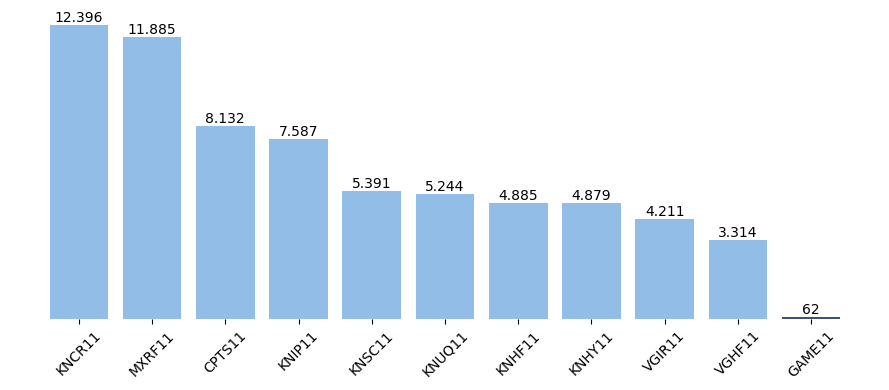

In [114]:

# Dados fornecidos
data_G1 = TOP10_LIQUIDEZ_GAME_ADD

# Criar o DataFrame
df = pd.DataFrame(data_G1)

# Definir as cores para destacar o GARE11.SA
cores = ['#91BDE7' if fundo != 'GAME11' else '#3B5279' for fundo in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQUIDEZ - MÉDIA'], color=cores)

# Adicionar rótulos de barra com separadores de milhares (usando ponto)
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:,.0f}'.replace(',', '.'),  # Formatar com separador de milhares como ponto
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_title('', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_LIQUIDEZ_MÉDIA_GAME.png', transparent = True, dpi=300, bbox_inches='tight')

# Exibir o gráfico
plt.show()

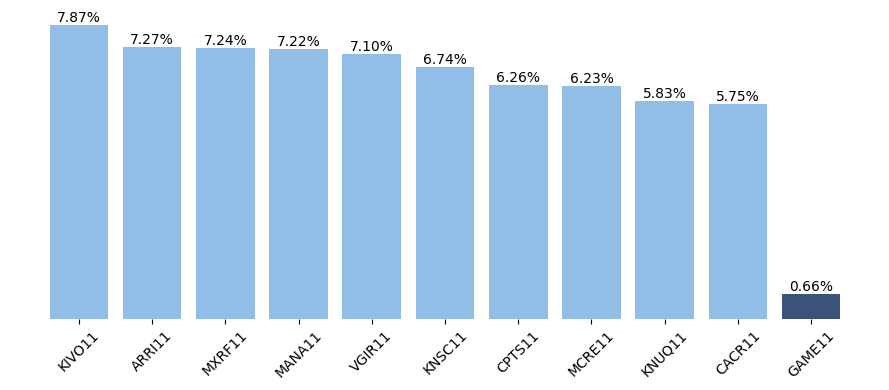

In [115]:

# Criar o DataFrame
df = pd.DataFrame(data)

cores = ['#3B5279' if ticker == 'GAME11' else '#91BDE7' for ticker in df['TICKER']]

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(9, 4))
barras = ax.bar(df['TICKER'], df['LIQ/VP'], color=cores)

# Adicionar rótulos de barra como porcentagem
for barra in barras:
    altura = barra.get_height()
    ax.text(
        barra.get_x() + barra.get_width() / 2, altura,  # Ajuste de posição vertical
        f'{altura:.2%}',  # Formatar como porcentagem
        ha='center', va='bottom', fontsize=10
    )

# Personalizar o gráfico
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_yaxis().set_visible(False)

# Ajustar layout
plt.xticks(rotation=45)
plt.tight_layout()

fig.savefig('TOP10_LIQSOMAxPL_GAME.png', transparent=True, dpi=300, bbox_inches = 'tight')

# Exibir o gráfico
plt.show()